In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Make_blobs dataset for clustering.
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=250, centers=5, random_state=42)
# Number of training examples and cluster centers.
m = X.shape[0] 
n = X.shape[1] 
n_iter = 100

In [2]:
# Shape of the dataset.
print(X.shape, y.shape)
print(m,n)

(250, 2) (250,)
250 2


In [3]:
# Inspect the dataset.
print(X[0:4])
y[0:4]

[[-0.62301172  9.18886394]
 [ 5.22673593  4.16362531]
 [-8.81381758  7.82152121]
 [-4.56496862 -8.74737479]]


array([0, 1, 3, 2])

Text(0.5, 1.0, 'Original Dataset')

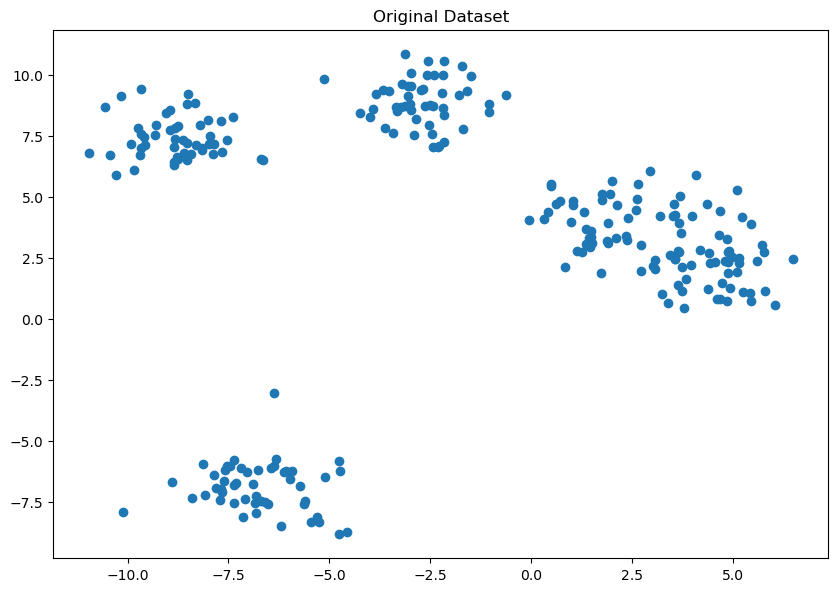

In [4]:
# Plot the clusters.
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(X[:,0],X[:,1])
plt.title('Original Dataset')

In [5]:
# Compute the initial centroids randomly.
import random
K=5
# Create an empty centroid array.
centroids = np.array([]).reshape(n,0) #shape = (2,5)
# Create 5 random centroids.
for k in range(K):
    centroids = np.c_[centroids, X[random.randint(0,m-1)]] #randint(0,249)

In [6]:
print(centroids[0:4])
centroids.shape

[[-6.3645795   5.78270165 -2.30033403 -9.6780496   2.5988572 ]
 [-3.0273781   2.72510272  7.054616    6.72413027  4.47270171]]


(2, 5)

In [7]:
# Create an empty array.
euclid = np.array([]).reshape(m,0)
# Find distance between from each points to three centroids.
for k in range(K):
       dist = np.sum((X-centroids[:,k])**2, axis=1) # dist = (250,)
       euclid = np.c_[euclid, dist] 
# euclid = (250,5)
# Store the minimum value we have computed.
minimum = np.argmin(euclid, axis=1)+1
minimum

array([3, 2, 4, 1, 3, 5, 1, 4, 3, 1, 1, 1, 1, 3, 2, 1, 3, 2, 1, 5, 5, 3,
       1, 3, 5, 2, 4, 2, 4, 3, 1, 1, 5, 5, 4, 4, 3, 2, 5, 4, 5, 4, 2, 5,
       4, 5, 5, 3, 2, 2, 4, 3, 1, 3, 2, 5, 1, 1, 1, 2, 4, 4, 5, 4, 5, 2,
       3, 5, 1, 2, 4, 3, 3, 2, 1, 5, 2, 3, 2, 1, 2, 5, 5, 5, 4, 1, 2, 1,
       4, 4, 5, 5, 1, 5, 4, 2, 4, 1, 5, 3, 4, 3, 3, 1, 4, 4, 5, 5, 3, 2,
       5, 5, 1, 1, 2, 4, 5, 2, 4, 5, 1, 1, 4, 4, 3, 4, 3, 4, 3, 2, 1, 3,
       4, 1, 3, 4, 4, 5, 3, 2, 1, 5, 4, 1, 2, 4, 4, 3, 4, 3, 1, 3, 2, 2,
       4, 2, 1, 5, 5, 5, 3, 5, 4, 5, 1, 1, 2, 5, 2, 3, 5, 5, 4, 5, 5, 1,
       3, 3, 2, 1, 2, 2, 2, 4, 4, 3, 1, 4, 1, 4, 3, 3, 4, 5, 4, 3, 5, 2,
       1, 1, 3, 3, 5, 1, 2, 3, 3, 1, 5, 3, 3, 5, 5, 4, 2, 1, 3, 4, 5, 3,
       1, 5, 5, 4, 4, 5, 4, 2, 1, 1, 1, 2, 3, 2, 5, 5, 2, 3, 5, 5, 3, 5,
       3, 3, 5, 1, 1, 2, 4, 2], dtype=int64)

In [8]:
def euclid_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [9]:
def plot(m,X,label,centroids):
   
    plt.figure(figsize=(10,7),dpi=100)
    color = ['blue','black','yellow','green','orange','red']
    for i in range(m):
        plt.scatter(X[i,0],X[i,1], color = color[label[i]])
    for k in range(K):
        plt.scatter(centroids[k,0],centroids[k,1], color = "purple")
    plt.show()

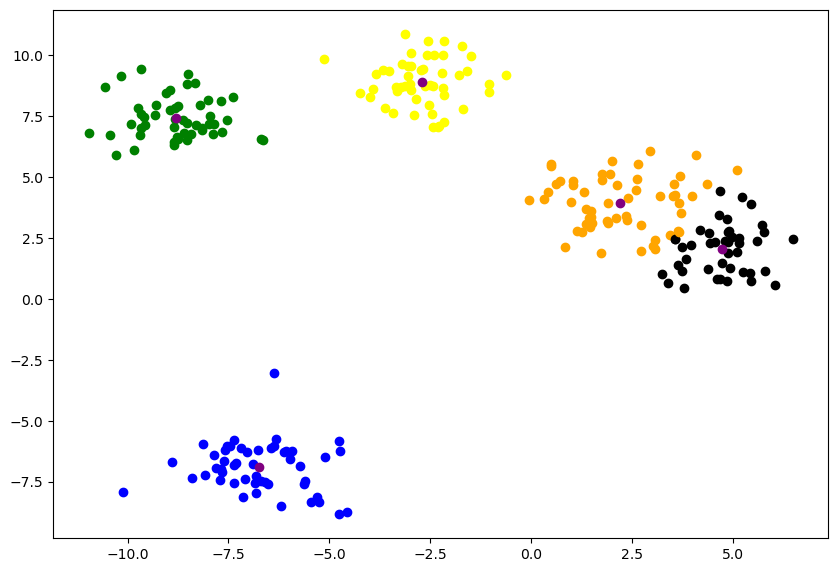

Converged in iteration 2


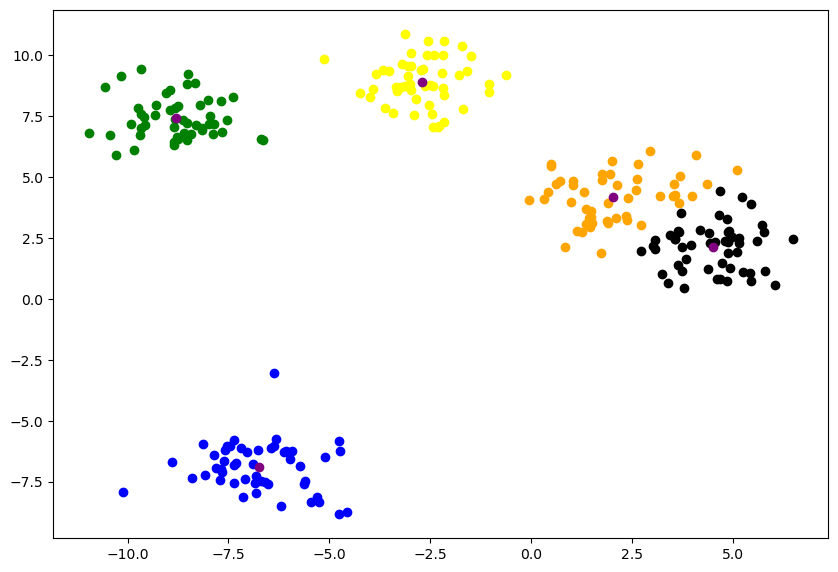

In [10]:
# Repeat the steps
centroids = centroids.T
for it in range(n_iter):
    label = []
    # Assign clusters to points.
    for i in range(m):
        distance = [euclid_distance(X[i],centroids[k]) for k in range(K)]
        min_index = np.argmin(distance)
        label.append(min_index)
    label = np.array(label)
    old_centroids = centroids.copy()
    # Compute mean and update.
    for k in range(K):
        k_index = np.where(label==k)[0]
        mean_centroid = np.mean(X[k_index],axis=0)
        centroids[k] = mean_centroid
    #plot graph in every 5 iterations
    if(it%4==0):
        plot(m,X,label,centroids)
    convergence = [np.abs(old_centroids-centroids) for k in range(K)]
    if(np.sum(convergence)<0.5):
        print(f"Converged in iteration {it}")
        plot(m,X,label,centroids)
        break
           


    

Text(0.5, 1.0, 'Original Dataset')

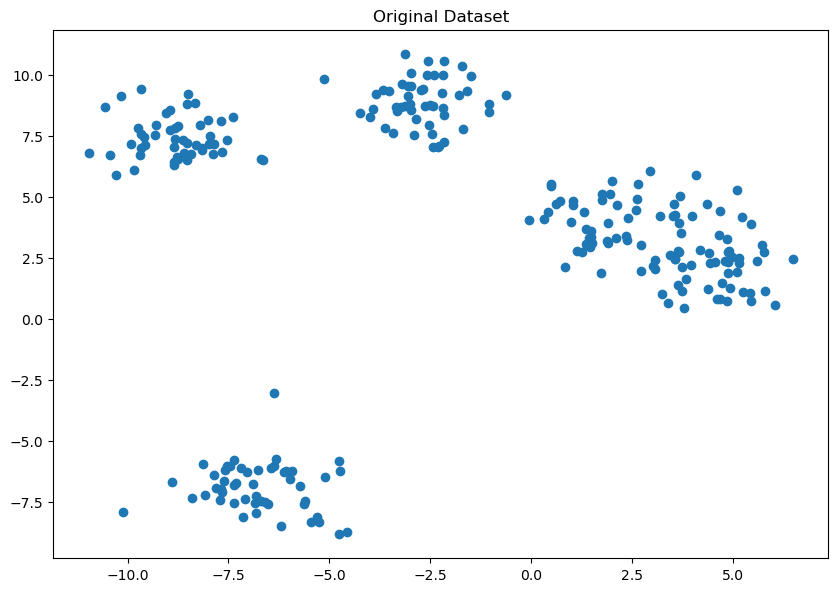

In [11]:
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(X[:,0], X[:,1])
plt.title('Original Dataset')

In [12]:
plt.figure(figsize=(10, 7), dpi=100)
for k in range(K):
    plt.scatter(final[k+1][:,0], final[k+1][:,1])
plt.scatter(centroids[0,:], centroids[1,:], s=100, c='purple')
plt.show()

NameError: name 'final' is not defined

<Figure size 1000x700 with 0 Axes>

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, centers=3, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1: 9862.490245314735
2: 2752.929084732387
3: 283.60067487251115
4: 242.31199874256336
5: 207.90367364519193
6: 179.67732143961226
7: 152.26430577555453
8: 132.77820745478508
9: 114.56964548212194
10: 103.82552184658061
11: 93.13139087052481
12: 86.47818164082688
13: 77.01227700351288
14: 68.97189223603321
15: 63.73944951673026
16: 57.64545241391093
17: 50.15598744719825
18: 47.68185400063974
19: 44.58181182937097
20: 40.15170651432485
21: 38.23866565333221
22: 35.5037989589782
23: 34.36906624284791
24: 30.692618521142496
25: 30.161375827486708
26: 27.64873084882853
27: 26.224650927637317
28: 24.234458474146766
29: 24.083389389014677


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


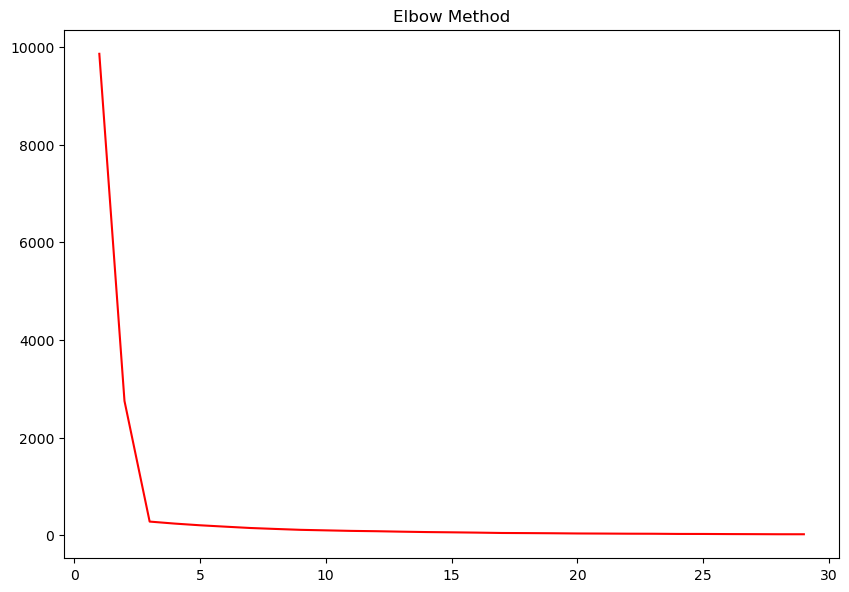

In [14]:
import seaborn as sns
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
    print('{}: {}'.format(i, elbow[i-1]))
plt.figure(figsize=(10, 7), dpi=100)
sns.lineplot(range(1, 30), elbow,color='red')
plt.title('Elbow Method')
plt.show()